**Exploratory Data Analysis and Prediction of Graduate Admission Probability**


*Introduction – Project Summary
Problem Statement*

Graduate admissions depend on multiple factors such as academic performance, test scores, research experience, and qualitative evaluations.

Applicants often lack clarity on which factors matter the most and how they collectively influence admission chances.

This project aims to analyze historical admission data and predict the probability of admission based on student profile attributes using data-driven methods.

Dataset Summary

The dataset contains student academic and profile-related features commonly used in graduate admission evaluations.

All variables are numerical and represent standardized scores or rating-based inputs.

*Key Attributes:*

GRE Score
TOEFL Score
University Rating
Statement of Purpose (SOP) rating
Letter of Recommendation (LOR) rating
CGPA
Research experience

Target Variable:
Chance of Admit – a continuous value between 0 and 1 representing admission probability.

**Student Admission Prediction - Masters Program**

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


This dataset helps in the prediction of admission of students in a foreign university

3. Dataset Overview

In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- Dataset contains only numeric values
- no missing values

4. Data Cleaning

In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_")


Irrelevant identifier columns were removed to avoid noise in analysis and modeling.

In [ ]:
5. Univariate Analysis - Numerical distributions

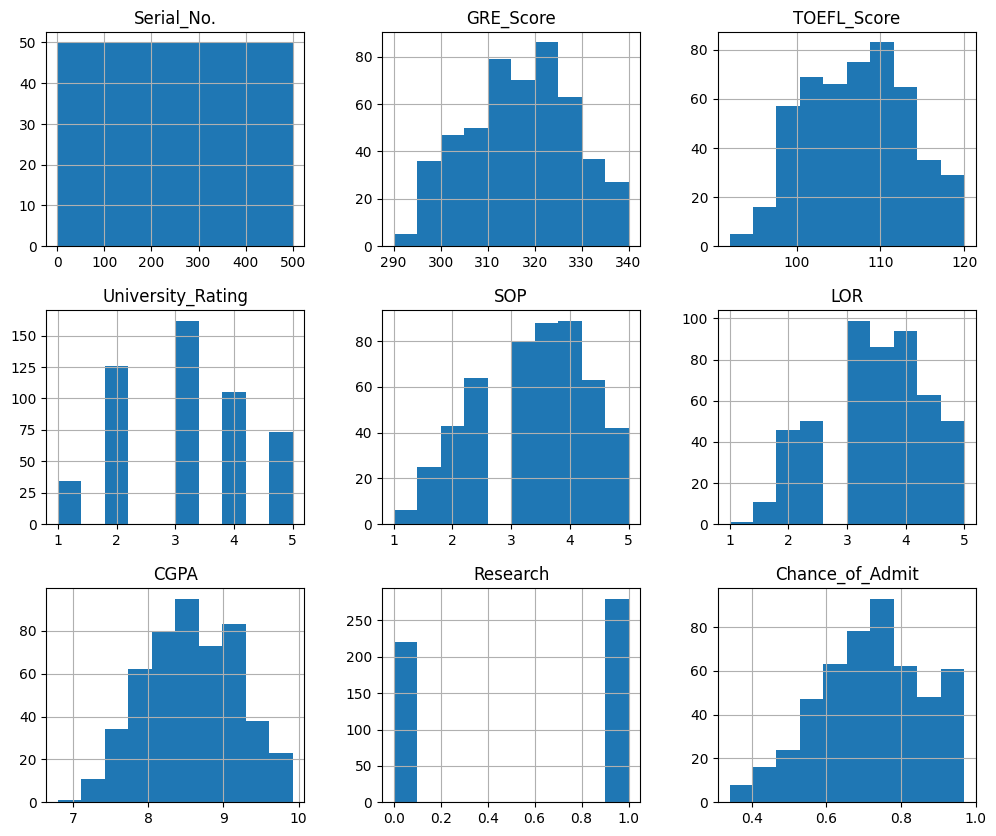

In [5]:
df.hist(figsize=(12,10))
plt.show()


From the above histogram
GRE score, TOEFL and CGPA are continuous.

- Most students score around average
- Few score very low or very high

**Insight**
- GRE Score, TOEFL Score, and CGPA are continuous variables and exhibit near-normal distributions, meaning most values cluster around the mean with fewer extremes. In contrast, SOP and LOR are discrete rating-based variables with limited possible values, so their distributions appear as distinct spikes rather than smooth curves

6. Target Variable - Chance_of_Admit

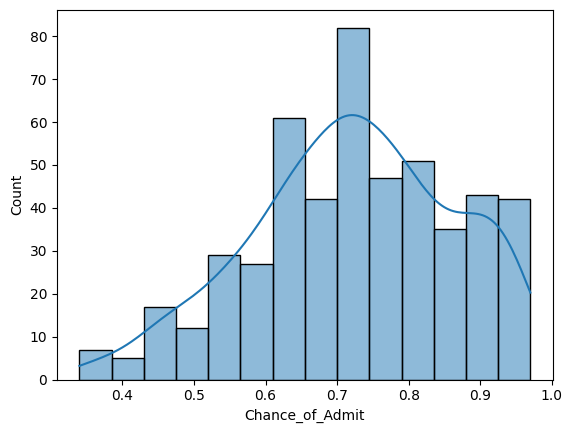

In [6]:
sns.histplot(df['Chance_of_Admit'], kde=True)
plt.show()


- Most students lie between 0.6 and 0.85
- Very few students have chances below 0.4
- Some students have very high chances (> 0.9)

INSIGHT -
Most applicants in this dataset have moderate to high chances of admission.

7. Bivariate Analysis (Feature vs Target)

a. CGPA vs Chance_of_Admit

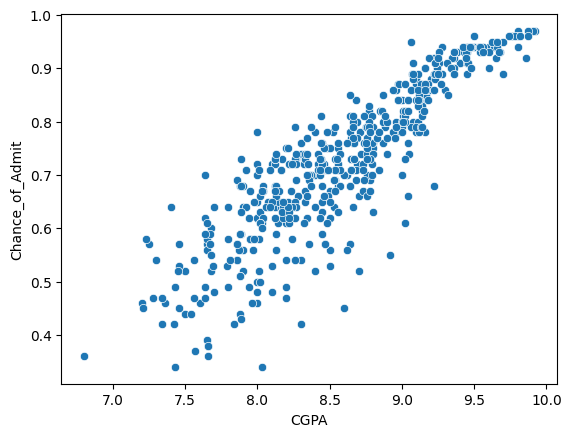

In [7]:
sns.scatterplot(x='CGPA', y='Chance_of_Admit', data=df)
plt.show()


b. GRE Score vs Chance_of_Admit

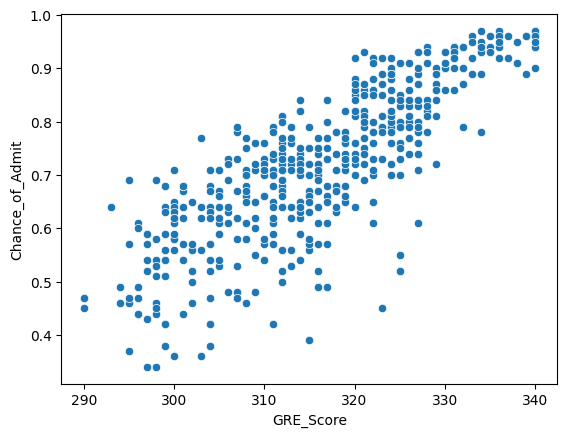

In [8]:
sns.scatterplot(x='GRE_Score', y='Chance_of_Admit', data=df)
plt.show()


CGPA and GRE Score show strong positive relationships with the chance of admission.

8. Multivariate Analysis

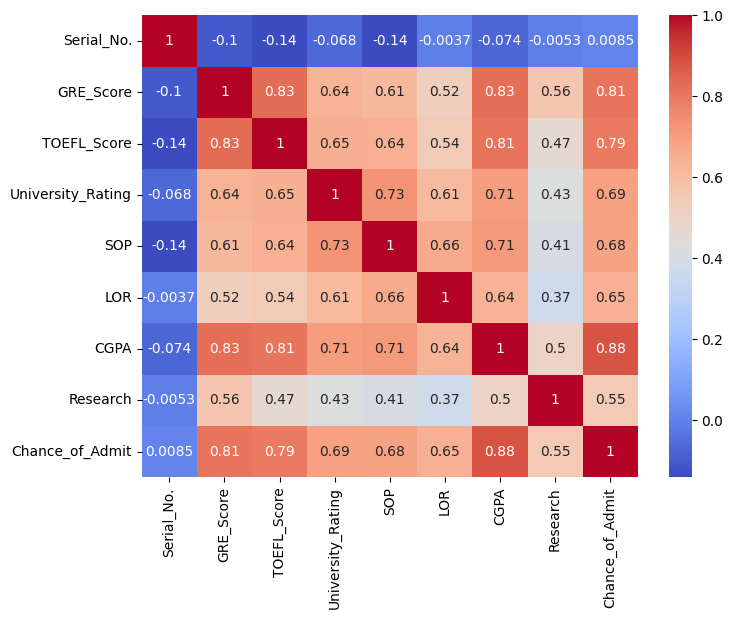

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Insight

CGPA, GRE Score, TOEFL Score, and University Rating are strongly correlated with admission probability.

9. Feature Selection

In [10]:
X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']


All academic and profile features were retained due to their strong correlation with the target variable.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


10. Model - Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
11. Model Evaluation

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(0.003551180545098713, 0.8263481396039749)

Based on marks and profile details, the model can understand and predict admission chances fairly accurately.

A good R² score means the model captures the relationship between student profiles and admission probability well

12. Feature Importance

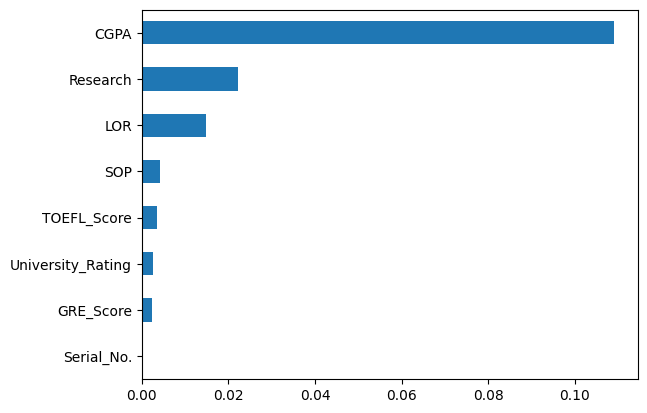

In [14]:
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.show()


Insight

CGPA and Research Score are the most influential factors in predicting admission probability.

- CGPA → highest
- Research → second highest
- GRE Score → very small

**Conclusion**

In this project, I analyzed a graduate admission dataset to understand the factors that influence a student’s chance of admission. Through exploratory data analysis, I observed that academic performance plays a major role, with CGPA being the most influential factor, followed by research experience. Other factors such as SOP, LOR, GRE, and TOEFL scores also contribute, but to a lesser extent when considered together.

A linear regression model was built to predict the probability of admission, and the results showed that the model is able to capture the relationship between student profiles and admission chances reasonably well. Overall, this project helped me gain practical experience in data exploration, feature analysis, and basic predictive modeling, and it clearly demonstrated how data-driven insights can be used to support decision-making.